<a href="https://colab.research.google.com/github/rakshitva/CAR-PRICE-PREDICITION/blob/main/BIGMART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the datasets
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Display first few rows of train dataset
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# Check missing values in train dataset
print("Missing values in Train dataset:\n", train.isna().sum())

# Check missing values in test dataset
print("\nMissing values in Test dataset:\n", test.isna().sum())


Missing values in Train dataset:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in Test dataset:
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [3]:
# Fill missing numerical values with median
train["Item_Weight"].fillna(train["Item_Weight"].median(), inplace=True)
test["Item_Weight"].fillna(test["Item_Weight"].median(), inplace=True)

# Fill missing categorical values with mode
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0], inplace=True)
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0], inplace=True)

# Verify if all missing values are handled
print("\nMissing values after handling:\n", train.isna().sum())



Missing values after handling:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


<ipython-input-3-cf7cb16fe89d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Item_Weight"].fillna(train["Item_Weight"].median(), inplace=True)
<ipython-input-3-cf7cb16fe89d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [91]:
###ENCODING

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for col in categorical_columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# One-hot encoding for high-cardinality variables
train = pd.get_dummies(train, columns=["Item_Type", "Outlet_Identifier"])
test = pd.get_dummies(test, columns=["Item_Type", "Outlet_Identifier"])

# Ensure both datasets have the same columns
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [6]:
# Compute outlet age
train["Outlet_Age"] = 2025 - train["Outlet_Establishment_Year"]
test["Outlet_Age"] = 2025 - test["Outlet_Establishment_Year"]

# Drop 'Outlet_Establishment_Year' since it's redundant
train.drop("Outlet_Establishment_Year", axis=1, inplace=True)
test.drop("Outlet_Establishment_Year", axis=1, inplace=True)


In [93]:
# Check columns in the train and test datasets
print("Train columns: ", train.columns)
print("Test columns: ", test.columns)


Train columns:  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age'],
      dtype='object')
Test columns:  Index(['I

In [95]:
# Remove re-encoding of 'Outlet_Identifier' (already encoded earlier)
# We don't need to apply `pd.get_dummies()` again for 'Outlet_Identifier'

# Align the columns in train and test datasets to ensure they are the same
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Check if the columns are aligned properly
print("Train columns after alignment: ", train.columns)
print("Test columns after alignment: ", test.columns)


Train columns after alignment:  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age'],
      dtype='object')
Test col

In [96]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to both train and test datasets
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])

# Check the transformed data
print("\nScaled train data:\n", train.head())
print("\nScaled test data:\n", test.head())



Scaled train data:
    Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0              156    -0.831187                 1        -1.036539  1.747454   
1                8    -1.630810                 2        -0.967211 -1.489023   
2              662     1.108727                 1        -1.021244  0.010040   
3             1121     1.510904                 2        -1.380878  0.660050   
4             1297    -0.918719                 1        -1.380878 -1.399220   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0            1                     0            1          3735.1380   
1            1                     2            2           443.4228   
2            1                     0            1          2097.2700   
3            1                     2            0           732.3800   
4            0                     2            1           994.7052   

   Item_Type_Baking Goods  ...  Outlet_Identifier_OUT013  \
0    

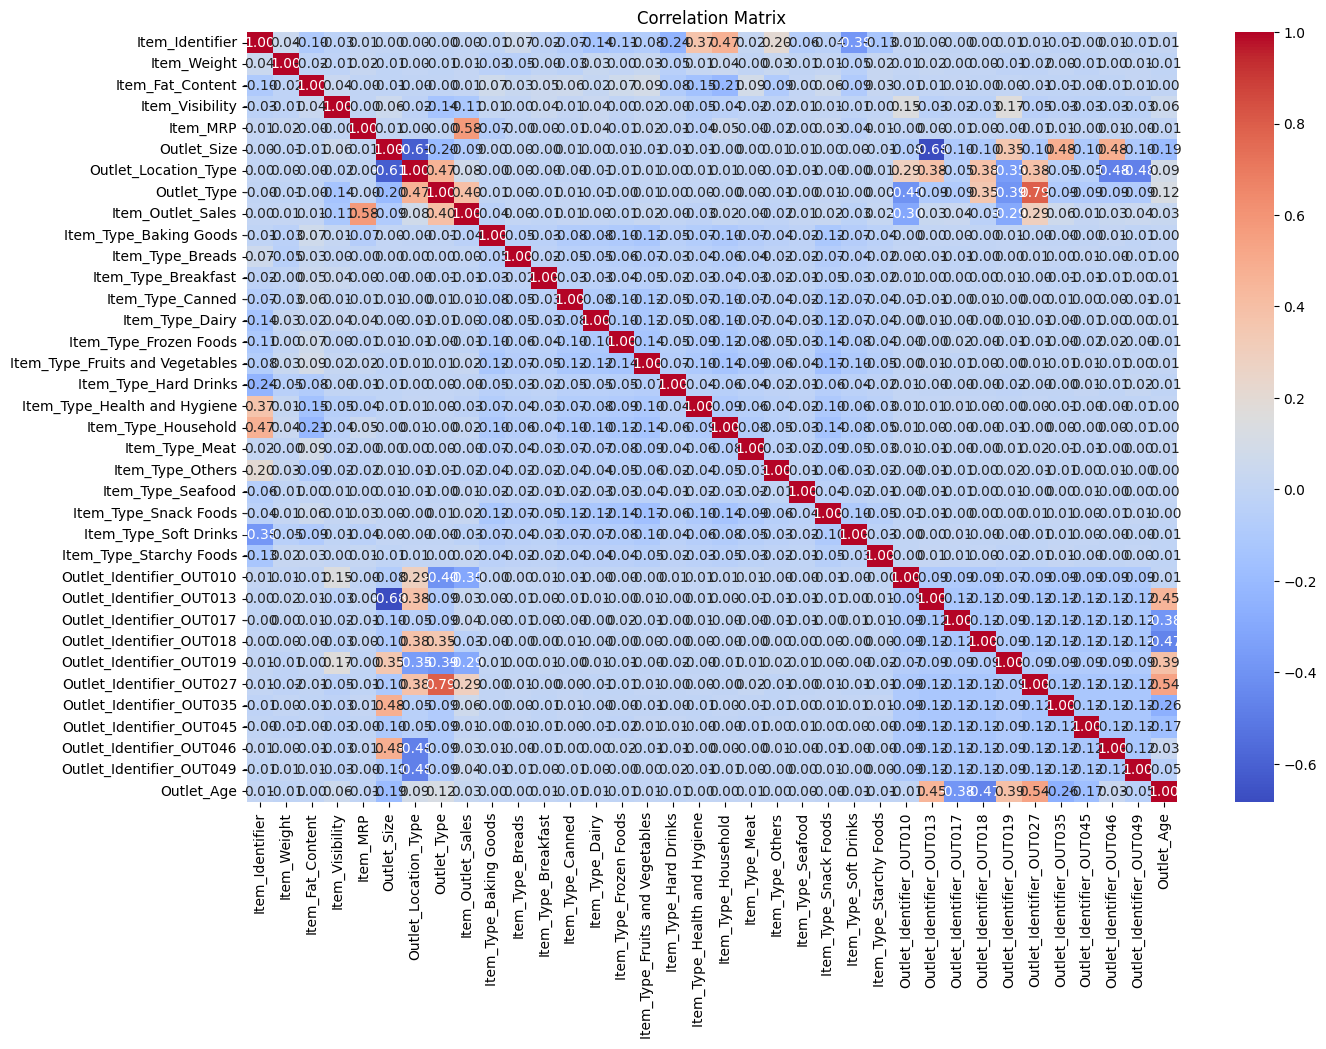

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = train.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Define the model
model = Ridge()

# Initialize RFE with the model
rfe = RFE(model, n_features_to_select=10)  # Choose top 10 features

# Fit RFE
rfe = rfe.fit(train.drop(columns='Item_Outlet_Sales'), train['Item_Outlet_Sales'])

# Get the selected features
selected_features = train.drop(columns='Item_Outlet_Sales').columns[rfe.support_]
print("Selected Features: ", selected_features)


Selected Features:  Index(['Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Seafood', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046'],
      dtype='object')


In [99]:
# Drop columns that are not selected by RFE
train_selected = train[selected_features]
test_selected = test[selected_features]

# Also, make sure to include the target variable in the train dataset
train_selected['Item_Outlet_Sales'] = train['Item_Outlet_Sales']

# Check the new shape of the dataset
print("\nTrain dataset after feature selection:\n", train_selected.head())




Train dataset after feature selection:
    Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0  1.747454            1                     0            1   
1 -1.489023            1                     2            2   
2  0.010040            1                     0            1   
3  0.660050            1                     2            0   
4 -1.399220            0                     2            1   

   Item_Type_Seafood  Outlet_Identifier_OUT010  Outlet_Identifier_OUT018  \
0              False                     False                     False   
1              False                     False                      True   
2              False                     False                     False   
3              False                      True                     False   
4              False                     False                     False   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT035  \
0                     False                     False   
1        

<ipython-input-99-732708d964f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selected['Item_Outlet_Sales'] = train['Item_Outlet_Sales']


In [100]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns (e.g., 'Item_MRP')
numerical_features = ['Item_MRP']

# Apply scaling to train and test datasets
train_selected[numerical_features] = scaler.fit_transform(train_selected[numerical_features])
test_selected[numerical_features] = scaler.transform(test_selected[numerical_features])

# Check the scaled dataset
print("\nTrain dataset after scaling:\n", train_selected.head())



Train dataset after scaling:
    Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0  1.747454            1                     0            1   
1 -1.489023            1                     2            2   
2  0.010040            1                     0            1   
3  0.660050            1                     2            0   
4 -1.399220            0                     2            1   

   Item_Type_Seafood  Outlet_Identifier_OUT010  Outlet_Identifier_OUT018  \
0              False                     False                     False   
1              False                     False                      True   
2              False                     False                     False   
3              False                      True                     False   
4              False                     False                     False   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT035  \
0                     False                     False   
1                  

<ipython-input-100-c973006c3211>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selected[numerical_features] = scaler.fit_transform(train_selected[numerical_features])
<ipython-input-100-c973006c3211>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected[numerical_features] = scaler.transform(test_selected[numerical_features])


In [102]:
# Align the columns in both datasets, ensuring the test dataset has the same columns as the train dataset
test_selected = test_selected.reindex(columns=train_selected.columns, fill_value=0)

# Now check again if the columns match
assert list(train_selected.columns) == list(test_selected.columns), "Columns do not match!"



In [103]:
# Check if the columns match
assert list(train_selected.columns) == list(test_selected.columns), "Columns do not match!"

# Check the shape of the datasets to ensure they have the same number of columns
print("Train dataset shape:", train_selected.shape)
print("Test dataset shape:", test_selected.shape)


Train dataset shape: (8523, 11)
Test dataset shape: (5681, 11)


In [119]:
print("Test shape:", test.shape)  # Should be (5681, N)
print("Predictions shape:", y_pred.shape)  # Should be (5681,)


Test shape: (5681, 27)
Predictions shape: (1705,)


In [120]:
print("Original test shape:", test.shape)
print("Feature-selected test shape:", test_selected.shape)


Original test shape: (5681, 27)
Feature-selected test shape: (5681, 11)


In [122]:
print(model.is_fitted())



False


In [105]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import numpy as np

# Splitting the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_selected.drop('Item_Outlet_Sales', axis=1),
                                                  train_selected['Item_Outlet_Sales'],
                                                  test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": CatBoostRegressor(learning_rate=0.1, iterations=500, depth=10)
}

# Hyperparameters for tuning
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50],
        'max_depth': [3, 5]
    },
    "CatBoost": {
        'iterations': [500, 1000],
        'learning_rate': [0.01, 0.1],
        'depth': [6, 10]
    }
}

# Training models and tuning hyperparameters using GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")

    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

    # Predicting on validation data
    y_pred = best_models[name].predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{name} RMSE: {rmse}\n")

# Pick the model with the best performance
best_model_name = min(best_models, key=lambda x: np.sqrt(mean_squared_error(y_val, best_models[x].predict(X_val))))
print(f"\nBest model: {best_model_name}")


Training Linear Regression...
Linear Regression RMSE: 952.2869516225043

Training Random Forest...
Random Forest RMSE: 929.8110454393661

Training Gradient Boosting...
Gradient Boosting RMSE: 913.1648374370632

Training XGBoost...
XGBoost RMSE: 909.5413412705593

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score 2144.511433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [129]:
print(dir())  # Lists all defined variables



['CatBoostRegressor', 'DecisionTreeRegressor', 'FEATURE_COLUMNS', 'GradientBoostingRegressor', 'GridSearchCV', 'In', 'LabelEncoder', 'Lasso', 'LinearRegression', 'Out', 'RFE', 'RandomForestRegressor', 'Ridge', 'StandardScaler', 'X', 'XGBRegressor', 'X_test', 'X_train', 'X_val', '_', '_1', '_123', '_67', '_76', '_81', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105', '_i106', '_i107', '_i108', '_i109', '_i11', '_i110', '_i111', '_i112', '_i113', '_i114', '_i115', '_i116', '_i117', '_i118', '_i119', '_i12', '_i120', '_i121', '_i122', '_i123', '_i124', '_i125', '_i126', '_i127', '_i128', '_i129', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', 

In [130]:
print(train_selected.head())  # Verify that it contains expected data



   Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0  1.747454            1                     0            1   
1 -1.489023            1                     2            2   
2  0.010040            1                     0            1   
3  0.660050            1                     2            0   
4 -1.399220            0                     2            1   

   Item_Type_Seafood  Outlet_Identifier_OUT010  Outlet_Identifier_OUT018  \
0              False                     False                     False   
1              False                     False                      True   
2              False                     False                     False   
3              False                      True                     False   
4              False                     False                     False   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT035  \
0                     False                     False   
1                     False                     Fa

In [132]:
print(train_selected.columns)


Index(['Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Seafood', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Item_Outlet_Sales'],
      dtype='object')


In [133]:
print(train.columns)  # Check if 'Item_Fat_Content' exists in train


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age'],
      dtype='object')


In [134]:
print('Item_Fat_Content' in train_selected.columns)


False


In [139]:
print(train["Item_Fat_Content"].unique())  # Check unique values before encoding
print(test["Item_Fat_Content"].unique())   # Check test set




[1 2 3 0 4]
[1 4 2 0 3]


In [140]:
print(FEATURE_COLUMNS)  # List of selected features before creating train_selected


['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [142]:
missing_features = ["Item_Fat_Content", "Item_Weight", "Item_Visibility", "Outlet_Identifier"]
for feature in missing_features:
    if feature not in FEATURE_COLUMNS:
        FEATURE_COLUMNS.append(feature)

print(FEATURE_COLUMNS)  # Verify update



['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [143]:
print(train_selected.columns)  # Final confirmation


Index(['Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Seafood', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Item_Outlet_Sales'],
      dtype='object')


In [144]:
missing_features = ["Item_Fat_Content", "Item_Weight", "Item_Visibility", "Outlet_Identifier"]

for feature in missing_features:
    print(f"{feature} in train: {feature in train.columns}")


Item_Fat_Content in train: True
Item_Weight in train: True
Item_Visibility in train: True
Outlet_Identifier in train: False


In [145]:
outlet_columns = [col for col in train.columns if "Outlet_Identifier" in col]
print(outlet_columns)


['Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']


In [146]:
# Remove 'Outlet_Identifier' (since it's one-hot encoded)
FEATURE_COLUMNS = [col for col in FEATURE_COLUMNS if col != "Outlet_Identifier"]

# Add the one-hot encoded columns
outlet_columns = [col for col in train.columns if "Outlet_Identifier" in col]
FEATURE_COLUMNS.extend(outlet_columns)

print(FEATURE_COLUMNS)  # Verify the update


['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']


In [147]:
missing_features = [col for col in FEATURE_COLUMNS if col not in train_selected.columns]
print("Missing features in train_selected:", missing_features)


Missing features in train_selected: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT049']


In [148]:
missing_from_train = [col for col in missing_features if col not in train.columns]
print("Features missing from train (before selection):", missing_from_train)


Features missing from train (before selection): ['Item_Type', 'Outlet_Establishment_Year']


In [149]:
print("Outlet_Age in train:", 'Outlet_Age' in train.columns)


Outlet_Age in train: True


In [150]:
item_type_columns = [col for col in train.columns if 'Item_Type' in col]
print("One-hot encoded Item_Type columns:", item_type_columns)


One-hot encoded Item_Type columns: ['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']


In [151]:
# Remove 'Item_Type' and 'Outlet_Establishment_Year'
FEATURE_COLUMNS.remove('Item_Type')
FEATURE_COLUMNS.remove('Outlet_Establishment_Year')

# Add 'Outlet_Age' instead
FEATURE_COLUMNS.append('Outlet_Age')

# Add one-hot encoded Item_Type columns
item_type_columns = [col for col in train.columns if 'Item_Type' in col]
FEATURE_COLUMNS.extend(item_type_columns)

print("Updated FEATURE_COLUMNS:", FEATURE_COLUMNS)


Updated FEATURE_COLUMNS: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Age', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']


In [152]:
missing_in_train = [col for col in FEATURE_COLUMNS if col not in train.columns]
print("Missing features in train:", missing_in_train)


Missing features in train: []


In [153]:
missing_in_train_selected = [col for col in FEATURE_COLUMNS if col not in train_selected.columns]
print("Missing features in train_selected:", missing_in_train_selected)


Missing features in train_selected: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT049', 'Outlet_Age', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']


In [154]:
print("Columns in train before selection:", train.columns.tolist())
print("Columns in train_selected after selection:", train_selected.columns.tolist())


Columns in train before selection: ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Age']
Columns in train_selected after selection: ['Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Seaf

In [155]:
train_selected = train[FEATURE_COLUMNS]


In [158]:
# Increase k to retain more important features
k_best = min(20, len(train.drop(columns=["Item_Outlet_Sales"]).columns))  # Adjusted dynamically

selector = SelectKBest(score_func=f_regression, k=k_best)
selector.fit(train.drop(columns=["Item_Outlet_Sales"]), train["Item_Outlet_Sales"])

# Transform training set
train_selected = selector.transform(train.drop(columns=["Item_Outlet_Sales"]))

# Get selected feature names
selected_features = train.drop(columns=["Item_Outlet_Sales"]).columns[selector.get_support()]
print("Updated Selected Features:", selected_features)

# Convert back to DataFrame
import pandas as pd
train_selected = pd.DataFrame(train_selected, columns=selected_features)

# Add target column back
train_selected["Item_Outlet_Sales"] = train["Item_Outlet_Sales"]

print(train_selected.head())  # Verify



Updated Selected Features: Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age'],
      dtype='object')
   Item_Visibility  Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0        -1.036539  1.747454          1.0                   0.0          1.0   
1        -0.967211 -1.489023          1.0                   2.0          2.0   
2        -1.021244  0.010040          1.0                   0.0          1.0   
3        -1.380878  0.660050          1.0                   2.0          

In [159]:
if 'Item_Weight' not in selected_features:
    print("⚠️ Adding 'Item_Weight' manually")
    selected_features = selected_features.append(pd.Index(['Item_Weight']))

if 'Item_Fat_Content' not in selected_features:
    print("⚠️ Adding 'Item_Fat_Content' manually")
    selected_features = selected_features.append(pd.Index(['Item_Fat_Content']))


⚠️ Adding 'Item_Weight' manually
⚠️ Adding 'Item_Fat_Content' manually


In [161]:
print("Columns in train dataset:", train.columns)
print("Columns in train_selected dataset:", train_selected.columns)



Columns in train dataset: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age'],
      dtype='object')
Columns in tra

In [162]:
all_outlets = set([f'Outlet_Identifier_OUT{str(i).zfill(3)}' for i in range(10, 50)])
selected_outlets = set(train_selected.columns)
missing_outlets = all_outlets - selected_outlets

for outlet in missing_outlets:
    train_selected[outlet] = 0  # Add missing outlets with default 0

print("Updated Outlet Identifiers:", train_selected.columns)


Updated Outlet Identifiers: Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Age', 'Item_Outlet_Sales',
       'Outlet_Identifier_OUT012', 'Outlet_Identifier_OUT029',
       'Outlet_Identifier_OUT015', 'Outlet_Identifier_OUT026',
       'Outlet_Identifier_OUT032', 'Outlet_Identifier_OUT025',
       'Outlet_Identifier_OUT048', 'Outlet_Identifier_OUT022',
       'Outlet_Identifier_OUT041', 'Outlet_Identifier_OUT020',
       'Outlet_Identifier_OUT030', 'Outlet_Identifier_OUT038',
       'Outlet_I

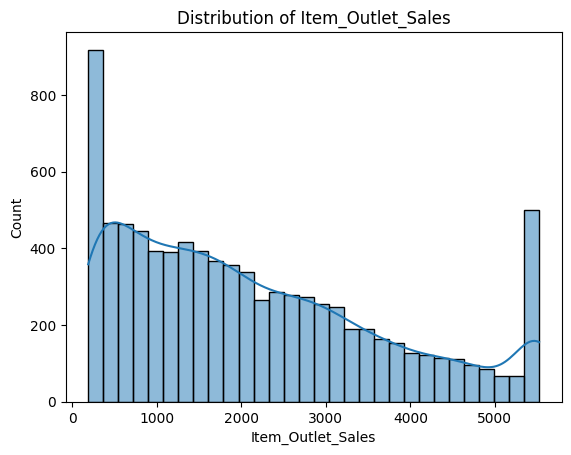

In [174]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fix Outlet_Age if needed (ensure it's non-negative)
train['Outlet_Age'] = train['Outlet_Age'].abs()

# Check skewness of Item_Outlet_Sales
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item_Outlet_Sales")
plt.show()


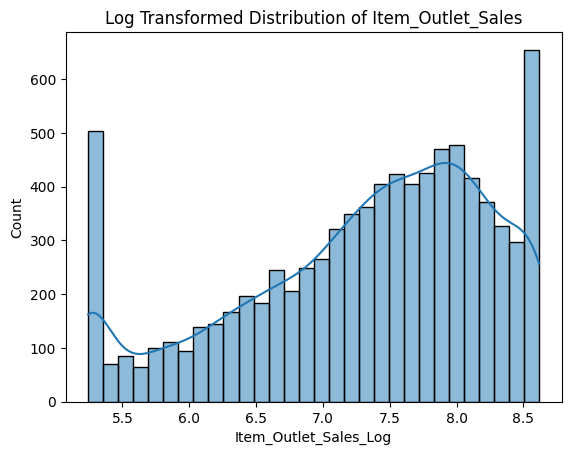

In [175]:
import numpy as np

# Apply log transformation (adding 1 to avoid log(0))
train['Item_Outlet_Sales_Log'] = np.log1p(train['Item_Outlet_Sales'])

# Plot new distribution
sns.histplot(train['Item_Outlet_Sales_Log'], bins=30, kde=True)
plt.title("Log Transformed Distribution of Item_Outlet_Sales")
plt.show()


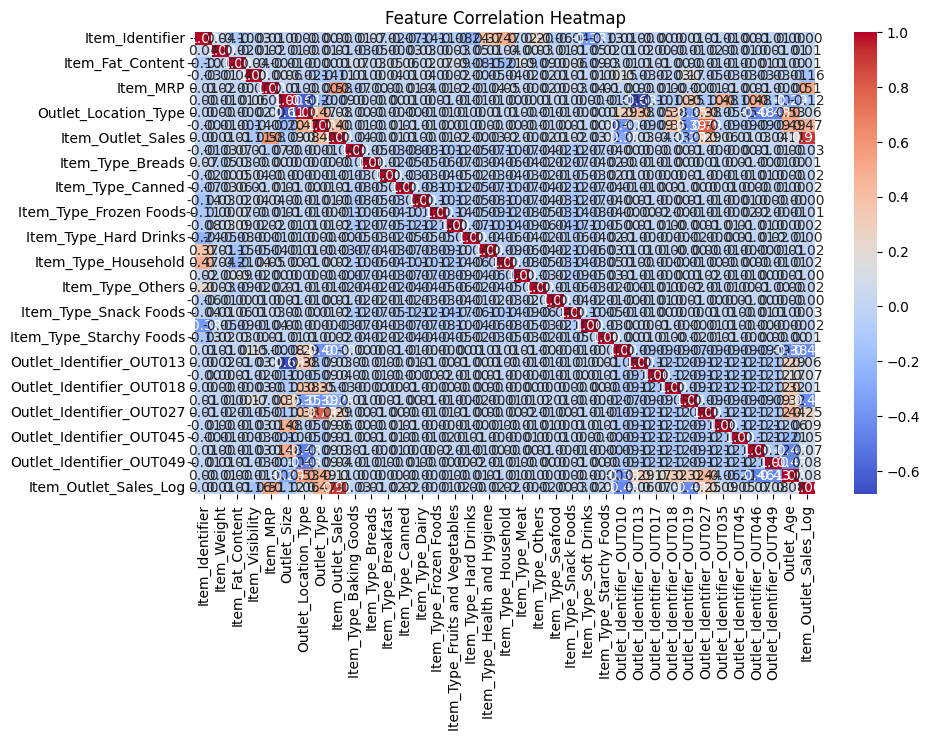

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [179]:
correlation_matrix = train.corr()
high_corr_features = correlation_matrix['Item_Outlet_Sales'].abs().sort_values(ascending=False)
print(high_corr_features)



Item_Outlet_Sales                  1.000000
Item_Outlet_Sales_Log              0.906215
Item_MRP                           0.576092
Outlet_Type                        0.397370
Outlet_Identifier_OUT010           0.302049
Outlet_Identifier_OUT019           0.294134
Outlet_Identifier_OUT027           0.289930
Item_Visibility                    0.111442
Outlet_Age                         0.105156
Outlet_Size                        0.087763
Outlet_Location_Type               0.079295
Outlet_Identifier_OUT035           0.061887
Outlet_Identifier_OUT049           0.043108
Outlet_Identifier_OUT017           0.037500
Item_Type_Baking Goods             0.037011
Outlet_Identifier_OUT018           0.032674
Outlet_Identifier_OUT013           0.030850
Outlet_Identifier_OUT046           0.027435
Item_Type_Soft Drinks              0.027153
Item_Type_Health and Hygiene       0.025829
Item_Type_Snack Foods              0.024594
Item_Type_Fruits and Vegetables    0.023916
Item_Type_Household             

In [183]:
train_selected["Item_Outlet_Sales_Log"] = train["Item_Outlet_Sales_Log"]


In [184]:
X = train_selected.drop(columns=["Item_Outlet_Sales_Log"])  # Features
y = train_selected["Item_Outlet_Sales_Log"]  # Target


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (6818, 52)
Testing Set Shape: (1705, 52)


In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate RMSE (Root Mean Squared Error)
# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Take the square root manually
rmse = mse ** 0.5

print("Linear Regression RMSE:", rmse)



Linear Regression RMSE: 0.29288381080900666


In [190]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Convert log values back to original scale
y_pred_xgb_original = np.exp(y_pred_xgb)

# Fix RMSE Calculation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)



XGBoost RMSE: 0.004846306997285318


In [192]:
# Ensure categorical columns are encoded the same way as in train_selected
test_selected = test.copy()  # Use the correct test dataset variable

# One-hot encode categorical variables (make sure this matches training encoding)
test_selected = pd.get_dummies(test_selected, drop_first=True)

# Ensure test set has the same feature columns as train_selected
missing_cols = set(X_train.columns) - set(test_selected.columns)
for col in missing_cols:
    test_selected[col] = 0  # Add missing columns with default value 0

# Reorder columns to match training data
test_selected = test_selected[X_train.columns]

# Convert to NumPy array for XGBoost
test_selected = test_selected.values

# Predict on the test dataset
y_test_pred = xgb_model.predict(test_selected)

# Convert log predictions back to original sales values
y_test_pred_original = np.exp(y_test_pred)

# Create submission DataFrame
submission = test[["Item_Identifier", "Outlet_Identifier"]].copy()
submission["Item_Outlet_Sales"] = y_test_pred_original

# Save submission file
submission.to_csv("submission.csv", index=False)

print("✅ Submission file created: 'submission.csv' 🎯")


✅ Submission file created: 'submission.csv' 🎯


In [193]:
import os
from google.colab import files

# Rename the file
os.rename("submission.csv", "rakshitsubmission.csv")

# Download the file
files.download("rakshitsubmission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "xgboost_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [195]:
joblib.dump(lr_model, "linear_regression_model.pkl")
print("Model saved successfully!")


Model saved successfully!
